## Pizza Price Prediction Using Machine Learning

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Pizza_v2.csv')

In [3]:
#Display Top 5 Rows of The Dataset
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [4]:
#Check Last 5 Rows of The Dataset
data.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes
128,E,"Rp78,000",12 inch,meat,BBQ_meat_fiesta,medium,no,no,yes


In [5]:
data.shape

(129, 9)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 129
Number of Columns 9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [8]:
data.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [9]:
#statastics
data.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,29,30,41,76,86,72


In [10]:
#Data Preprocessing
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [11]:
data.rename({'price_rupiah':'price'},axis=1,inplace=True)

In [12]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [13]:
data['price']=data['price'].str.replace("Rp","")
data['price']=data['price'].str.replace(",","").astype('int32')

In [14]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price            129 non-null    int32 
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: int32(1), object(8)
memory usage: 8.7+ KB


In [16]:
def convert(value):
    return value*0.0054

In [17]:
data['price']=data['price'].apply(convert)

In [18]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [19]:
data['diameter'] = data['diameter'].str.replace("inch","")
data['diameter'] = data['diameter'].str.replace(" ","").astype('float32')

In [20]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


### Data Analysis

In [21]:
#Univariate Analysis
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

### Company

In [22]:
data['company'].value_counts()

company
C    30
E    30
A    25
B    24
D    20
Name: count, dtype: int64

### Price

In [23]:
import matplotlib.pyplot as plt

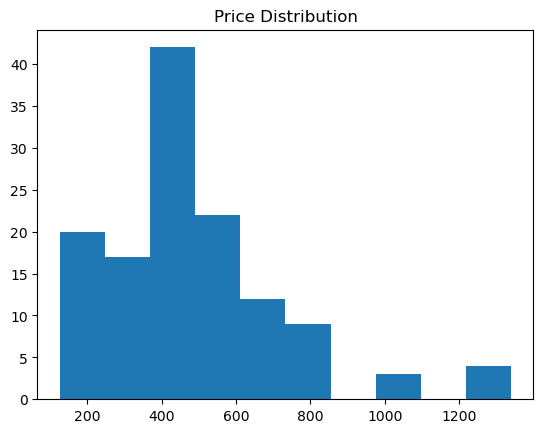

In [24]:
plt.hist(x = "price",data=data)
plt.title("Price Distribution")
plt.show()

### Diameter

In [25]:
data['diameter'].value_counts()

diameter
12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: count, dtype: int64

In [26]:
import seaborn as sns

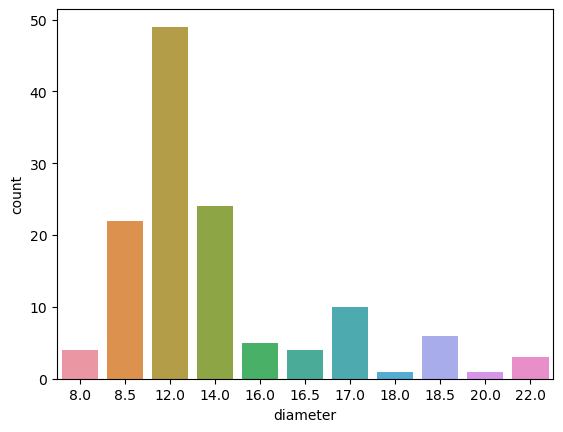

In [27]:
sns.countplot(data=data, x='diameter')
plt.show()

### Topping

In [28]:
data['topping'].value_counts()

topping
chicken         29
mushrooms       22
mozzarella      21
smoked_beef     19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='topping'>

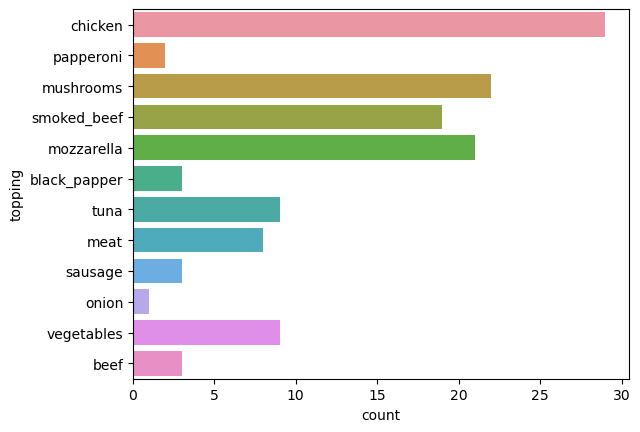

In [29]:
sns.countplot(y = data['topping'])

### Variant

In [30]:
data['variant'].value_counts()

variant
classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='variant'>

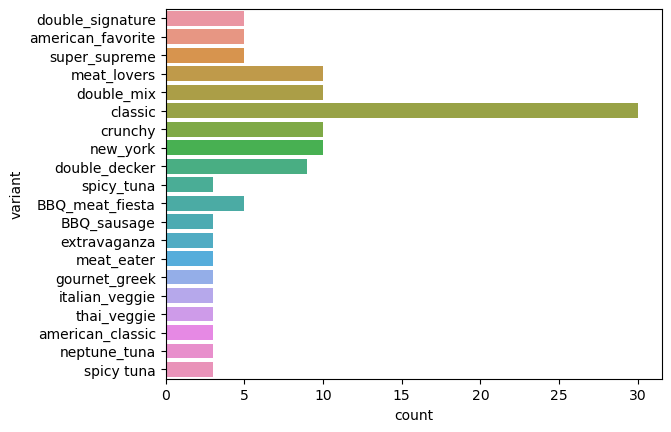

In [31]:
sns.countplot(y = data['variant'])

### Size

In [32]:
data['size'].value_counts()

size
medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='size'>

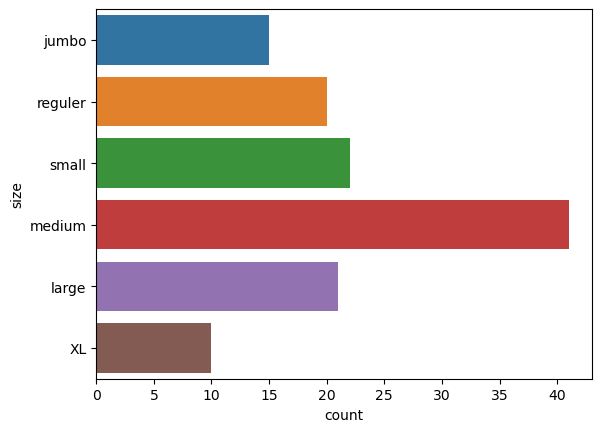

In [33]:
sns.countplot(y = data['size'])

### Extra Sauce

<Axes: xlabel='count', ylabel='extra_sauce'>

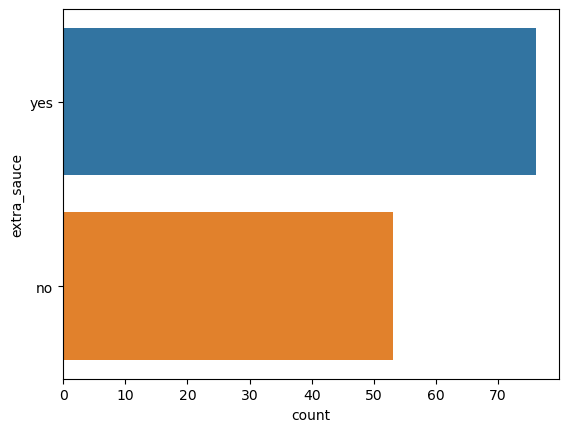

In [34]:
sns.countplot(y = data['extra_sauce'])

### Extra Cheese

<Axes: xlabel='count', ylabel='extra_cheese'>

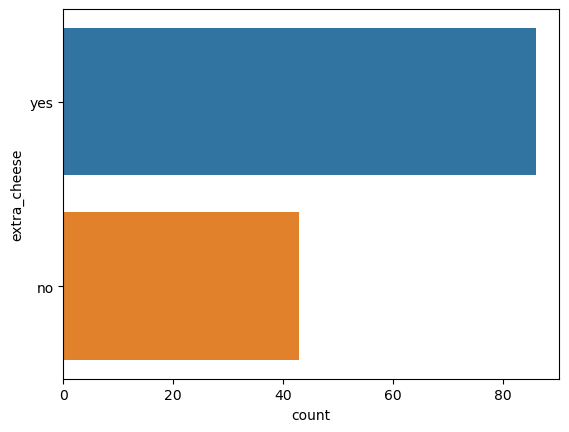

In [35]:
sns.countplot(y = data['extra_cheese'])

### Extra Mushrooms

<Axes: xlabel='count', ylabel='extra_mushrooms'>

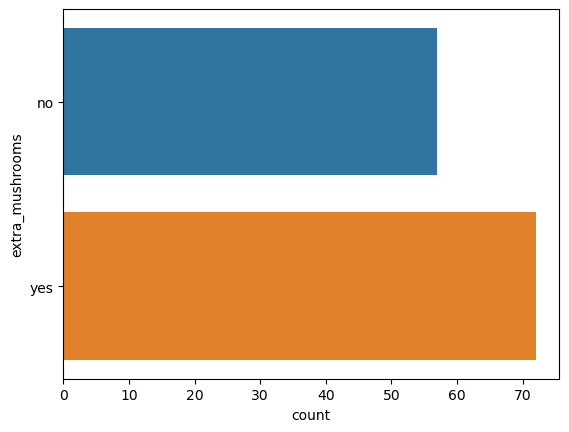

In [36]:
sns.countplot(y = data['extra_mushrooms'])

In [37]:
## Bivariate Analysis

### Price by Company

In [38]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

<Axes: xlabel='company', ylabel='price'>

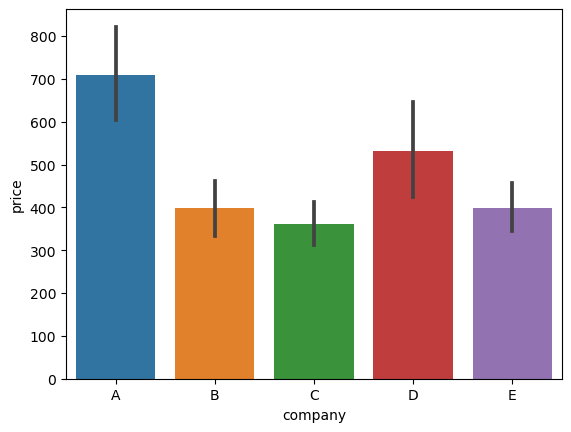

In [39]:
sns.barplot(x = data['company'],y = data['price'])

### Price by topping

In [40]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

<Axes: xlabel='price', ylabel='topping'>

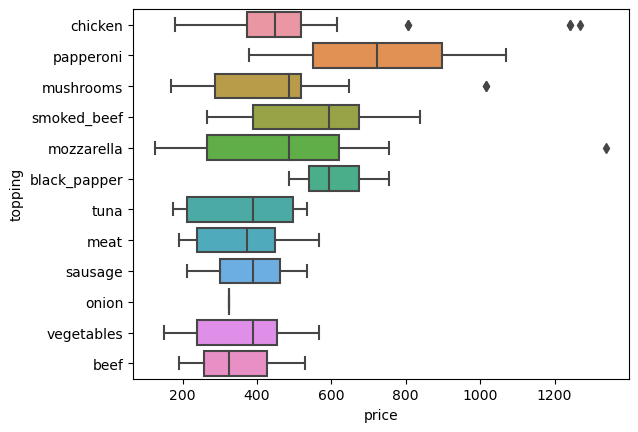

In [41]:
sns.boxplot(y='topping',x='price',data=data)

### Price by size

<Axes: xlabel='size', ylabel='price'>

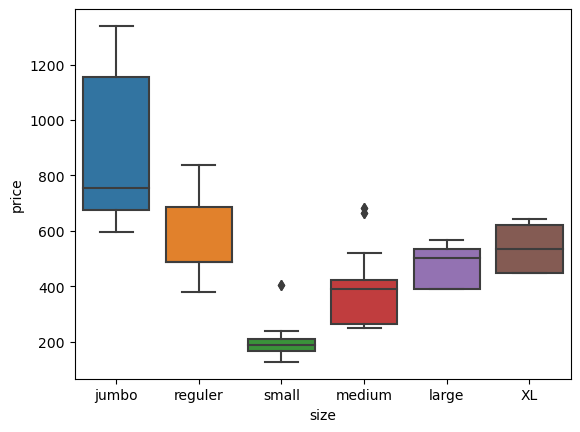

In [42]:
sns.boxplot(x='size',y='price',data=data)

### The most expensive pizza

In [43]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [44]:
data[data['price'].max()==data['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


### Diameters of jumbo size pizza

In [45]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [46]:
data[data['size']=='jumbo']['diameter'].head()

0    22.0
1    20.0
4    18.0
5    18.5
6    16.0
Name: diameter, dtype: float32

### Diameters of XL size pizza

In [47]:
data[data['size']=='XL']['diameter'].head()

29    17.0
35    17.0
41    17.0
47    17.0
93    17.0
Name: diameter, dtype: float32

### Remove outliers

In [48]:
data[(data['size']=='jumbo') & (data['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,594.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,594.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [49]:
data = data.drop(data.index[[6,11,16,80]])

## Label Encoding

In [50]:
#Label encoding convert categorical variables into numerical format

In [51]:
cat_cols=data.select_dtypes(include=['object']).columns

In [52]:
cat_cols

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese',
       'extra_mushrooms'],
      dtype='object')

In [53]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [54]:
from sklearn.preprocessing import LabelEncoder
#The sklearn use for statistical modeling including classification, regression, clustering and dimensionality reduction.

In [55]:
en=LabelEncoder()
for i in cat_cols:
    data[i]=en.fit_transform(data[i])

In [56]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


### Store Feature Matrix In X and Response(Target) In Vector y

In [57]:
X= data.drop('price',axis=1) #Dependet variables
y = data['price'] #Independet variables

### Splitting The Dataset Into The Training Set And Test Set

In [58]:
from sklearn.model_selection import train_test_split #module

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                               random_state=42) #20% data for testing
#2 training models x_train and y_train
#perform predictions in x_test and compare with y_test

###  Import The models

In [60]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


In [61]:
pip install xgboost

In [62]:
#Target variables is heaving countinuous values it is regression problem
from sklearn.linear_model import LinearRegression
from  sklearn.svm import SVR # Support Vector Regression
from sklearn.ensemble import RandomForestRegressor #constructs multiple decision trees and averages their predictions to improve accuracy and robustness.
from sklearn.ensemble import GradientBoostingRegressor #builds multiple decision trees sequentially, each correcting the errors of the previous one, leading to a powerful ensemble model.
from xgboost import XGBRegressor #XGBRegressor is an implementation of gradient boosting decision trees designed for speed and performance.

In [63]:
#Linear regression is an algorithm that provides a linear relationship between an 
#independent variable and a dependent variable to predict the outcome of future events

### Model Training

In [64]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm  = SVR()
svm.fit(X_train,y_train)

rf  = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr = GradientBoostingRegressor() #instance of this
gbr.fit(X_train,y_train)

xg = XGBRegressor() #instance os this
xg.fit(X_train,y_train) #train on our training set

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Prediction on Test Data

In [65]:
y_pred1 = lr.predict(X_test) #using linear regression
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xg.predict(X_test)

### Evaluating the Algorithm

In [66]:
from sklearn import metrics #marix module

In [67]:
score1 = metrics.r2_score(y_test,y_pred1) #actual values in y_test and predicted value in Y_pred1
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)

In [68]:
print(score1,score2,score3,score4,score5)

0.6712827779795156 -0.058422678416528706 0.8295315348833853 0.893059989500473 0.8029020264469139


In [69]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GB','XGR'],
             'R2_SCORE':[score1,score2,score3,score4,score5]})

In [70]:
final_data

,Models,R2_SCORE
0,LR,0.671283
1,SVR,-0.058423
2,RF,0.829532
3,GB,0.893060
4,XGR,0.802902


In [71]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='R2_SCORE'>

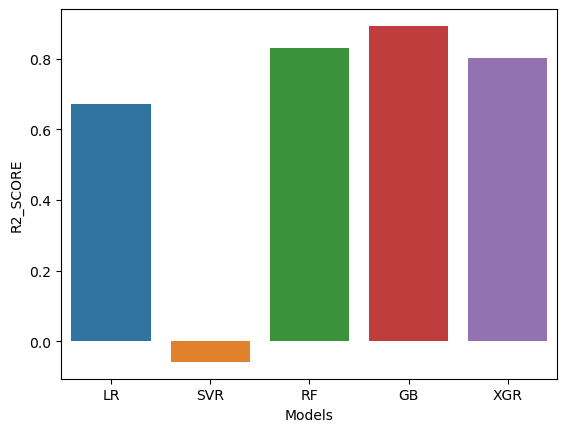

In [72]:
sns.barplot(x = final_data['Models'],y = final_data['R2_SCORE'])

### Feature Importance

#### 1 Random Forest

In [73]:
rf.feature_importances_

array([0.02893809, 0.61312583, 0.03518136, 0.11841471, 0.16482523,
       0.021319  , 0.01345388, 0.00474191])

In [74]:
fea = pd.Series(rf.feature_importances_,index=X_train.columns)

<Axes: >

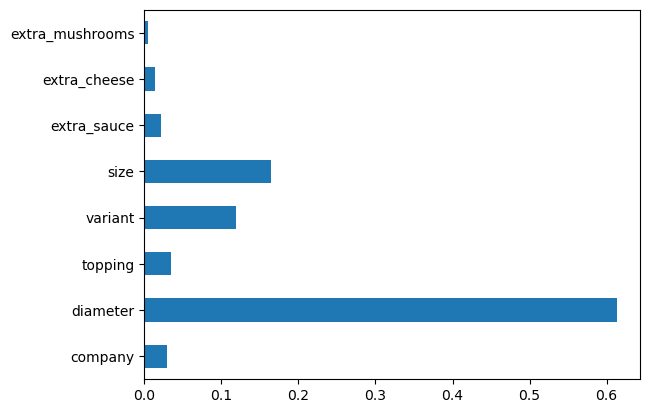

In [75]:
fea.plot(kind='barh') #LR importance in diameter

#### 2 Gradient Boosting Regressor

In [76]:
gbr.feature_importances_

array([0.00628595, 0.63660543, 0.05312779, 0.10169165, 0.16313725,
       0.03394436, 0.00251249, 0.00269508])

In [77]:
fea = pd.Series(gbr.feature_importances_,index=X_train.columns)

<Axes: >

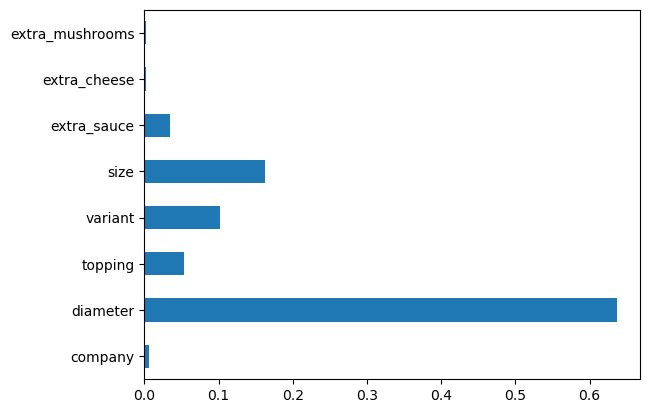

In [78]:
fea.plot(kind='barh') 

#### 3 XGBRegressor

In [79]:
xg.feature_importances_

array([0.0080106 , 0.39336628, 0.01220485, 0.07297975, 0.44671908,
       0.05231223, 0.0084051 , 0.00600212], dtype=float32)

In [80]:
fea = pd.Series(xg.feature_importances_,index=X_train.columns)

<Axes: >

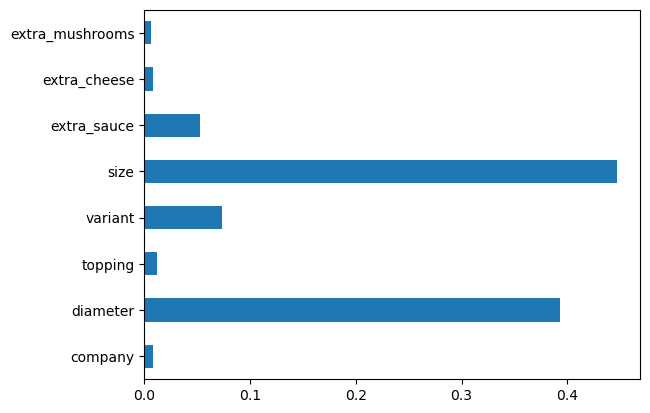

In [81]:
fea.plot(kind='barh')

### Save The Model

In [82]:
X = data.drop('price',axis=1) #all independent variables #perform prediction using the model
y = data['price'] #all dependent variables

In [83]:
xgb=XGBRegressor()

In [84]:
xgb.fit(X,y) #best model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
import joblib

In [86]:
joblib.dump(xgb,'pizza_price_predict') #to save our model

['pizza_price_predict']

In [87]:
model = joblib.load('pizza_price_predict') #load the model

In [88]:
import pandas as pd
df = pd.DataFrame({
    'company':1,
    'diameter':22.0,
    'topping':2,
    'variant':8,
    'size':1,
    'extra_sauce':1,
    'extra_cheese':1,
    'extra_mushrooms':1
},index=[0])

In [89]:
df

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,1,22.0,2,8,1,1,1,1


In [90]:
model.predict(df)

array([1262.8436], dtype=float32)

# GUI

In [91]:
from tkinter import *
import joblib
import pandas as pd

In [ ]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())

    model = joblib.load('pizza_price_predict')
    df = pd.DataFrame({
    'company':p1,
    'diameter':p2,
    'topping':p3,
    'variant':p4,
    'size':p5,
    'extra_sauce':p6,
    'extra_cheese':p7,
    'extra_mushrooms':p8
},index=[0])
    result = model.predict(df)
    
    Label(master, text="Pizza Price is").grid(row=31)
    Label(master, text=result).grid(row=32)
    print("Pizza Price Prediction", result)
    
master =Tk()
master.title("Pizza Price Prediction Using Machine Learning")
label = Label(master,text = "Pizza Price Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Company Name").grid(row=1)
Label(master,text = "Enter Your Diameter of the Pizza").grid(row=2)
Label(master,text = "Topping").grid(row=3)
Label(master,text = "Variant").grid(row=4)
Label(master,text = "Size").grid(row=5)
Label(master,text = "extra_sauce [1:yes,0:No]").grid(row=6)
Label(master,text = "extra_cheese [1:yes,0:No] ").grid(row=7)
Label(master,text = "extra_mushrooms [1:yes,0:No]").grid(row=8)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()